In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
def acc (q):
    # Parameter values
    alpha0 = 5.0
    beta0 = 5.0

    alpha = alpha0/3
    beta = beta0/4
    fa = lambda r : -r - alpha*r**2 - beta*r**3
    q1 = np.roll(q, 1)
    dif_q = q - q1
    a = np.zeros(len(q))
    a += fa(dif_q)
    q1 = np.roll(q, -1)
    dif_q = q - q1
    a += fa(dif_q)
    a[0] = a[-1] = 0

    return a

def vverlet_step (x, v, dt, i):
    aux_acc = acc(x[i])
    x[i+1] = x[i] + v[i]*dt + 0.5*aux_acc*dt**2
    aux_acc_dt = acc(x[i+1])
    v[i+1] = v[i] + 0.5*(aux_acc + aux_acc_dt)*dt


def vverlet (x, v, dt, time):
    for i in range(time-1):
        vverlet_step(x, v, dt, i)

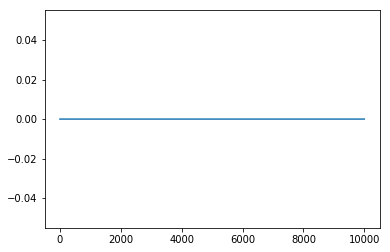

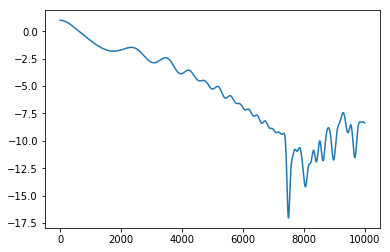

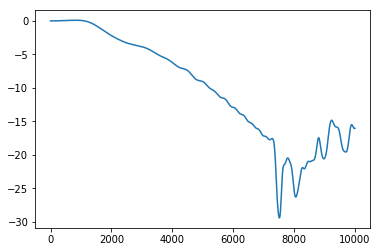

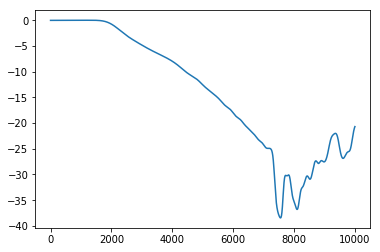

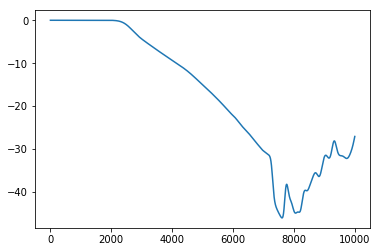

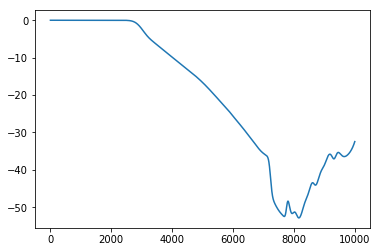

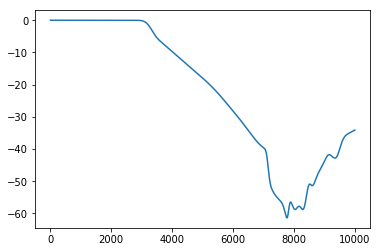

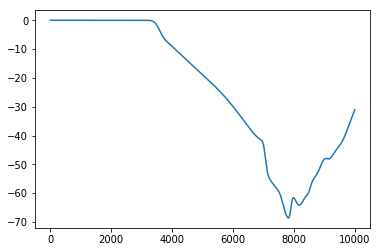

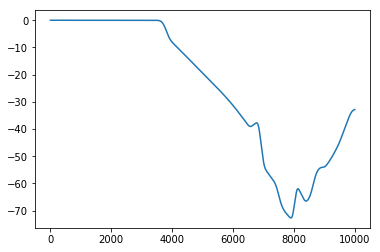

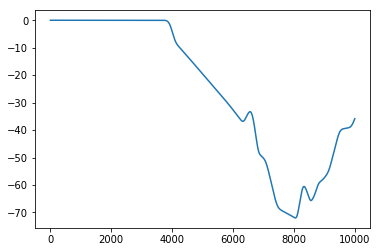

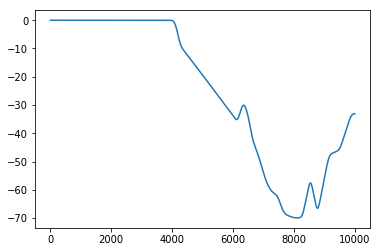

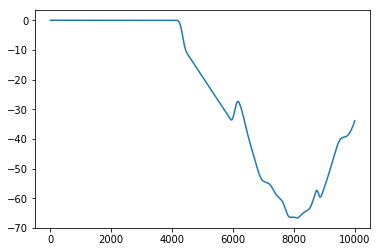

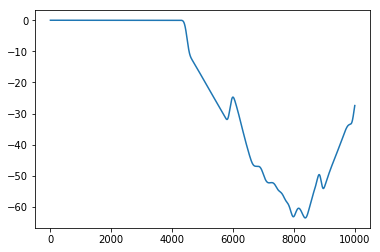

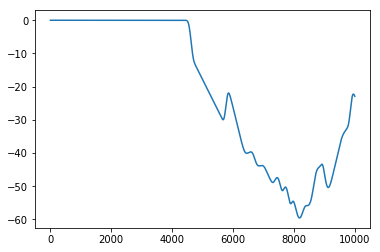

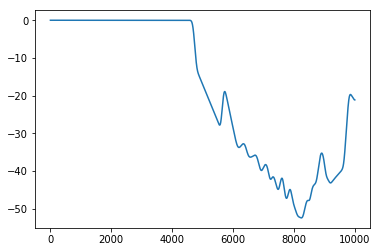

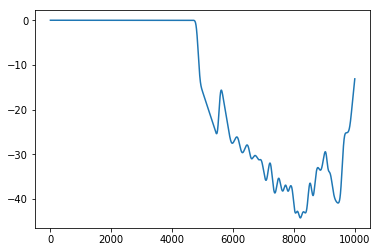

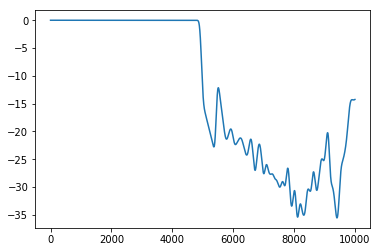

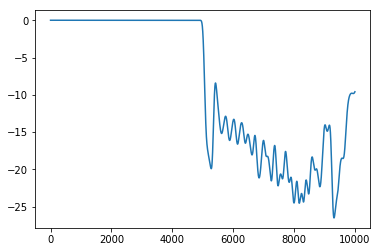

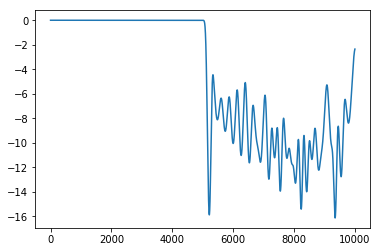

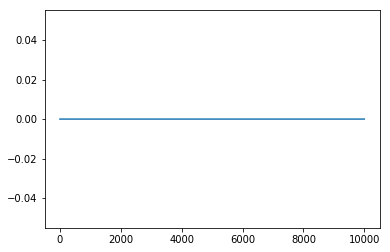

In [94]:
time = 10000
dt = 1e-3
size = 20
x = np.zeros((time, size))
v = np.zeros((time, size))

# Initial conditions
x[0, 1] = 1.0
v[0, 1] = 0.0

vverlet(x, v, dt, time)

t = np.arange(0, time)
for i in range(size):
    fig, ax = plt.subplots()
    ax.plot(t, x[:, i])